# Bee Corp Quant Data Analysis

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt 
import calendar

In [279]:
# read the dataset
quant_df = pd.read_excel('Quant Round.xlsx')

## Exploratory Anaysis

In [280]:
quant_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Item Price,Quantity,SalesTotal,Discount,Profit
0,2718,CA-2011-100006,2013-09-07,41530,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,125.990,3,377.970,0.0,109.6113
1,6288,CA-2011-100090,2013-07-08,41467,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,167.496,3,502.488,0.2,-87.9354


In [ ]:
quant_df.info()

In [ ]:
quant_df.describe()

In [ ]:
# Check if there are any null values in the dataset
quant_df.isnull().sum()

In [287]:
quant_df['Order Date']
quant_df['Order month'] = quant_df['Order Date'].dt.month
quant_df['Order month'] = quant_df['Order month'].apply(lambda x: calendar.month_abbr[x])
quant_df['Order year'] = quant_df['Order Date'].dt.year
quant_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Item Price,Quantity,SalesTotal,Discount,Profit,Order month,Order year
0,2718,CA-2011-100006,2013-09-07,41530,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,Technology,Phones,AT&T EL51110 DECT,125.990,3,377.970,0.0,109.6113,Sep,2013
1,6288,CA-2011-100090,2013-07-08,41467,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,Furniture,Tables,Hon 2111 Invitation Series Corner Table,167.496,3,502.488,0.2,-87.9354,Jul,2013


## Region 

Customer Analytics
### which region has the most customers?
### region and type of customers
### region and sales
### in a region which states has the most customers

Product Analytics
### most popular product in each region
### Top 5 products ordered by Corporate, consumer and home offices
### Item earning maximum profit , item in loss in each region


Order Analytics;
### states and number of orders
### states with highest sales

## Region Analysis

## Which region has the most customers

[<matplotlib.text.Text at 0x16d494a8>, <matplotlib.text.Text at 0x16e0c908>]

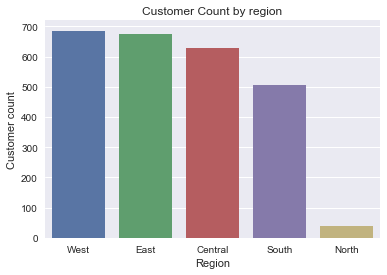

In [273]:
customer_in_region = quant_df.groupby('Region')['Customer ID'].nunique().sort_values(ascending=False)
customer_in_region_df = pd.DataFrame(customer_in_region)
customer_in_region_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Customer ID', data=customer_in_region_df).set(ylabel = 'Customer count'
                                                                         , title = 'Customer Count by region')

## Which region has the most orders over all the years

[<matplotlib.text.Text at 0x17798550>, <matplotlib.text.Text at 0x17852978>]

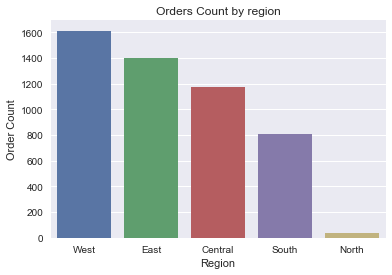

In [281]:
orders_by_region = quant_df.groupby(by='Region')['Order ID'].nunique().sort_values(ascending=False)
orders_by_region_df = pd.DataFrame(orders_by_region)
orders_by_region_df.reset_index(inplace=True)
sns.barplot(x= 'Region',y='Order ID',data = orders_by_region_df).set(ylabel = 'Order Count',
                                                                     title = 'Orders Count by region')

## Which region has the most orders in recent year-2016

In [304]:
orders_by_region_2016 = quant_df[quant_df['Order year']==2013]
orders_by_region_2016.groupby(by='Region')['Order ID'].nunique().sort_values(ascending=False)
#orders_by_region_df = pd.DataFrame(orders_by_region)
#orders_by_region_df.reset_index(inplace=True)
#sns.barplot(x= 'Region',y='Order ID',data = orders_by_region_df).set(ylabel = 'Order Count',
#                                                                     title = 'Orders Count by region')
#orders_by_region_2016

Region
West       313
East       261
Central    230
South      147
North       35
Name: Order ID, dtype: int64

## Region with highest sales

In [ ]:
sales_by_region = quant_df.groupby(by='Region')['SalesTotal'].sum().sort_values(ascending=False)
sales_by_region_df = pd.DataFrame(sales_by_region)
sales_by_region_df.reset_index(inplace=True)
sns.barplot(x='Region', y='SalesTotal',data = sales_by_region_df).set(ylabel='Sales Total Count', 
                                                                  title='Sales by region')

## Profit by region

In [ ]:
profit_by_region = quant_df.groupby(by='Region')['Profit'].sum().sort_values(ascending=False)
profit_by_region_df = pd.DataFrame(profit_by_region)
profit_by_region_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Profit',data = profit_by_region_df).set(ylabel='Profit', 
                                                                  title='profit by region')

## Most popular type of customer segments in each region

[<matplotlib.text.Text at 0x16ea0630>, <matplotlib.text.Text at 0x16eb5550>]

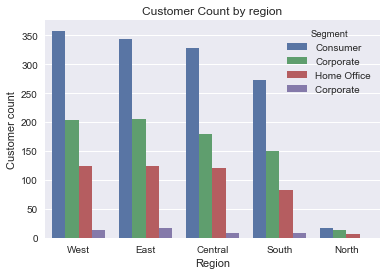

In [305]:
csegments_in_region = quant_df.groupby(by =['Region','Segment'])['Customer ID'].nunique().sort_values(ascending=False)
csegments_in_region_df = pd.DataFrame(csegments_in_region)
csegments_in_region_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Customer ID', data=csegments_in_region_df, hue ='Segment').set(ylabel = 'Customer count'
                                                                         , title = 'Customer Count by region')

In [ ]:
## Despite higher number of sales in Central region as compared to the South Region, South has higher profit than Central 

# Product Analytics

### Most popular product category in every region

[<matplotlib.text.Text at 0x167b5550>, <matplotlib.text.Text at 0x167bfb00>]

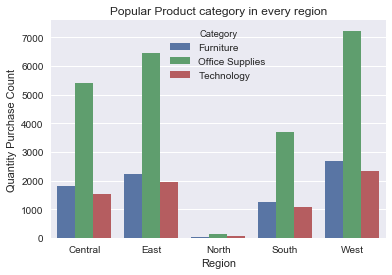

In [257]:
popular_product_category = quant_df.groupby(by=['Region','Category'])['Quantity'].sum().sort_values(ascending=False)
popular_product_category_df=pd.DataFrame(popular_product_category)
popular_product_category_df.reset_index(inplace=True)
popular_product_category_df=popular_product_category_df.groupby(['Region','Category'])['Quantity'].max()
popular_product_category_df=pd.DataFrame(popular_product_category_df)
popular_product_category_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Quantity', data =popular_product_category_df, hue='Category').set(title='Popular Product category in every region',
                                                                                            ylabel='Quantity Purchase Count')


In [285]:
quant_df['Order Date']
quant_df['Order month'] = quant_df['Order Date'].dt.month
quant_df['Order month'] = quant_df['Order month'].apply(lambda x: calendar.month_abbr[x])
quant_df['Order year'] = quant_df['Order Date'].dt.year
quant_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Item Price,Quantity,SalesTotal,Discount,Profit,Order month,Order year
0,2718,CA-2011-100006,2013-09-07,41530,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,Technology,Phones,AT&T EL51110 DECT,125.990,3,377.970,0.0,109.6113,Sep,2013
1,6288,CA-2011-100090,2013-07-08,41467,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,Furniture,Tables,Hon 2111 Invitation Series Corner Table,167.496,3,502.488,0.2,-87.9354,Jul,2013


## Which  month shows the maximum order?

[<matplotlib.text.Text at 0x14b337b8>, <matplotlib.text.Text at 0x1452e550>]

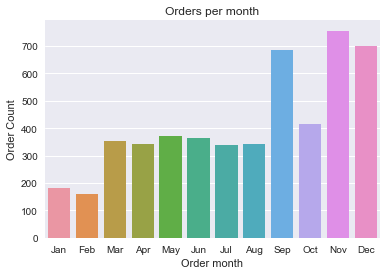

In [256]:
orders_by_month = quant_df.groupby(by='Order month')['Order ID'].nunique()
orders_by_month_df =pd.DataFrame(orders_by_month)
orders_by_month_df.reset_index(inplace=True)
orders_by_month_df
sns.barplot(x='Order month', y='Order ID', data =orders_by_month_df, x_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Orders per month', ylabel='Order Count')

In [ ]:
# Observations: Item price of the chairs is listed incorrectly int he dataset and needs to be changed

In [261]:
nov_df=quant_df[quant_df['Order month']=='Nov']
nov_df.groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending=False)

Sub-Category
Binders        222
Paper          193
Furnishings    148
Phones         133
Storage        127
Accessories    126
Art            108
Chairs          95
Appliances      66
Labels          45
Tables          43
Envelopes       42
Fasteners       36
Bookcases       35
Supplies        27
Machines        21
Copiers          7
Name: Sub-Category, dtype: int64

In [267]:
nov_df=quant_df[quant_df['Order month']=='Feb']
nov_df.groupby('Sub-Category')['Sub-Category'].count().sort_values(ascending=False)

Sub-Category
Binders        43
Paper          41
Phones         33
Furnishings    31
Accessories    25
Storage        24
Art            18
Chairs         17
Appliances     16
Labels         13
Fasteners      12
Tables          8
Bookcases       7
Envelopes       6
Supplies        3
Machines        2
Name: Sub-Category, dtype: int64

In [ ]:

#s = pd.Series([])
#from xlrd.xldate import xldate_as_tuple
#from datetime import datetime
#s.apply(lambda x: datetime(*xldate_as_tuple(x, 0)))

In [270]:
quant_df.corr()

,Row ID,Ship Date,Postal Code,Item Price,Quantity,SalesTotal,Discount,Profit
Row ID,1.000000,0.010639,0.009671,0.018908,-0.004016,-0.001359,0.013480,0.012497
Ship Date,0.010639,1.000000,0.010777,-0.019725,0.000204,-0.009565,-0.003869,0.004352
Postal Code,0.009671,0.010777,1.000000,0.010252,0.012761,-0.023854,0.058443,-0.029961
Item Price,0.018908,-0.019725,0.010252,1.000000,0.011169,0.467772,-0.015969,0.250313
Quantity,-0.004016,0.000204,0.012761,0.011169,1.000000,0.200795,0.008623,0.066253
SalesTotal,-0.001359,-0.009565,-0.023854,0.467772,0.200795,1.000000,-0.028190,0.479064
Discount,0.013480,-0.003869,0.058443,-0.015969,0.008623,-0.028190,1.000000,-0.219487
Profit,0.012497,0.004352,-0.029961,0.250313,0.066253,0.479064,-0.219487,1.000000


In [ ]:
Assumptions

# 1. Naming convention issues in Corporate segment. In some cases a blank space appears after the word.
# Had to make it consistent
# 2. Incorrect Item price for rowID 6570
